# Import Libraries <a class="anchor" id="chapter1"></a>

<i> Install the libraries below if you don't have them already </i>

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.chdir("C:/Users/migue/OneDrive - NOVAIMS/Data Science/Coding Courses/Machine Learning II/Project")
# wd stands for working directory
wd = os.getcwd()

from functions.funcs import *

In [24]:
import pandas as pd
import numpy as np
import umap
import umap.plot
import matplotlib.pyplot as plt
import seaborn as sns



c:\Users\migue\OneDrive - NOVAIMS\Data Science\Coding Courses\Machine Learning II\.venv\Lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


# Load the Data <a class="anchor" id="chapter2"></a>

In [6]:
dfs = create_dfs(wd + "/UMAP/umap_cluster_data/")

for key in dfs.keys():
    globals()[key] = dfs[key]
    print(f"Created global variable {blue}{key}{end} with values from dictionary dfs key {blue}{key}{end}")

Created dataframe best_customers from best_customers.csv
Created dataframe big_families from big_families.csv
Created dataframe cranky_elders from cranky_elders.csv
Created dataframe fish_markets from fish_markets.csv
Created dataframe gamers from gamers.csv
Created dataframe Info_v2 from Info_v2.csv
Created dataframe party_animals from party_animals.csv
Created dataframe promotion_seekers from promotion_seekers.csv
Created dataframe vegetarians from vegetarians.csv
Created dataframe young_adults from young_adults.csv
Created global variable best_customers with values from dictionary dfs key best_customers
Created global variable big_families with values from dictionary dfs key big_families
Created global variable cranky_elders with values from dictionary dfs key cranky_elders
Created global variable fish_markets with values from dictionary dfs key fish_markets
Created global variable gamers with values from dictionary dfs key gamers
Created global variable Info_v2 with values from dic

In [10]:
seed = 42

In [21]:
# add column lifetime_spend_meat_fish to all clusters in dfs
for key in dfs.keys():
    dfs[key] = dfs[key].assign(lifetime_spend_meat_fish = dfs[key].lifetime_spend_meat + dfs[key].lifetime_spend_fish)


In [16]:
# combine "lifetime_spend_meat" and "lifetime_spend_fish" into "lifetime_spend_meat_fish"
Info_v2['lifetime_spend_meat_fish'] = Info_v2['lifetime_spend_meat'] + Info_v2['lifetime_spend_fish']

In [17]:
spend = [col for col in Info_v2.columns if 'spend' in col]

In [18]:
# remove "lifetime_spend_meat", "lifetime_spend_fish", "lifetime_spend" and "lifetime_spend_groceries" from spend
spend = [col for col in spend if col not in ['lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend', 'spend_per_year']] #, 'lifetime_spend_groceries'

In [19]:
len(spend)

8

In [13]:
reducer = umap.UMAP(n_components=2,
                    n_neighbors=30,
                    min_dist=0.1,
                    random_state=seed)


In [27]:
# Visualize each cluster on a 2d scatter plot with UMAP

for cluster_name, cluster_values in dfs.items():
    globals()[f"reducer_{cluster_name}"] = umap.UMAP(n_components=2,
                                        n_neighbors=30,
                                        min_dist=0.1,
                                        random_state=seed
                                        )

    print(f"Visualizing cluster {cluster_name}")
    globals()["embbeded_{}".format(cluster_name)] = globals()[f"reducer_{cluster_name}"].fit_transform(cluster_values[spend])
    print(f"Created global variable embbeded_{cluster_name} with values from reducer.transform({cluster_name})")


Visualizing cluster best_customers
Created global variable embbeded_best_customers with values from reducer.transform(best_customers)
Visualizing cluster big_families
Created global variable embbeded_big_families with values from reducer.transform(big_families)
Visualizing cluster cranky_elders
Created global variable embbeded_cranky_elders with values from reducer.transform(cranky_elders)
Visualizing cluster fish_markets
Created global variable embbeded_fish_markets with values from reducer.transform(fish_markets)
Visualizing cluster gamers
Created global variable embbeded_gamers with values from reducer.transform(gamers)
Visualizing cluster Info_v2


c:\Users\migue\OneDrive - NOVAIMS\Data Science\Coding Courses\Machine Learning II\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Created global variable embbeded_Info_v2 with values from reducer.transform(Info_v2)
Visualizing cluster party_animals
Created global variable embbeded_party_animals with values from reducer.transform(party_animals)
Visualizing cluster promotion_seekers
Created global variable embbeded_promotion_seekers with values from reducer.transform(promotion_seekers)
Visualizing cluster vegetarians
Created global variable embbeded_vegetarians with values from reducer.transform(vegetarians)
Visualizing cluster young_adults
Created global variable embbeded_young_adults with values from reducer.transform(young_adults)


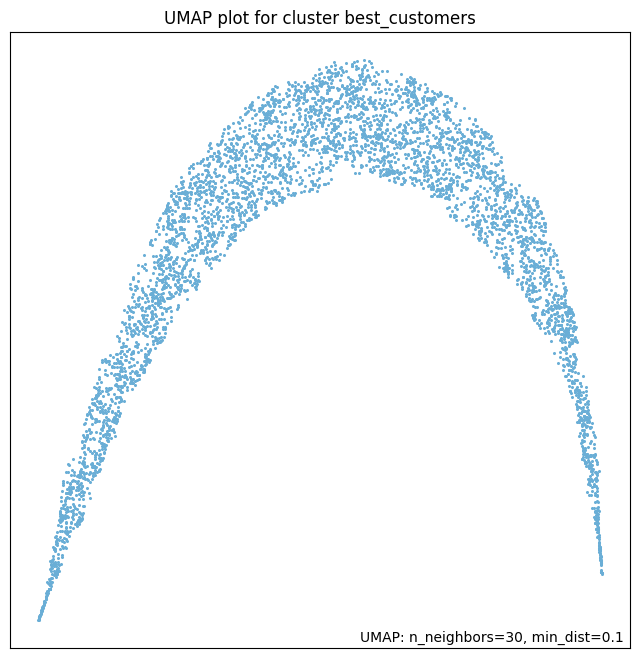

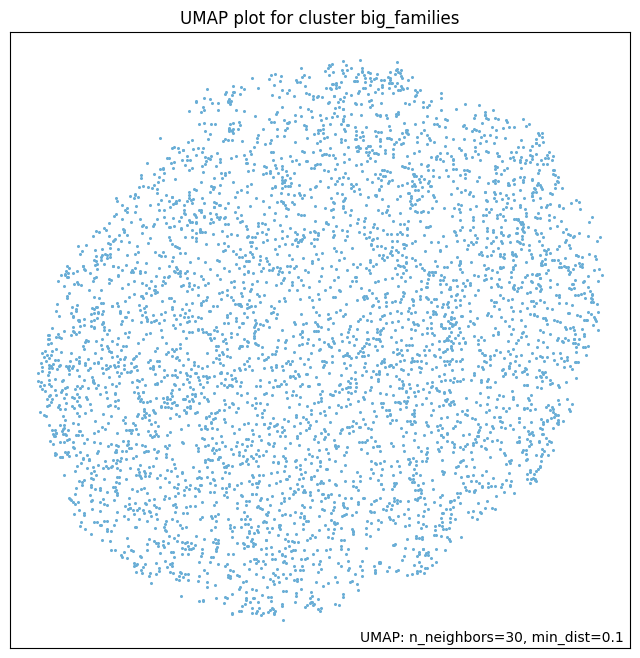

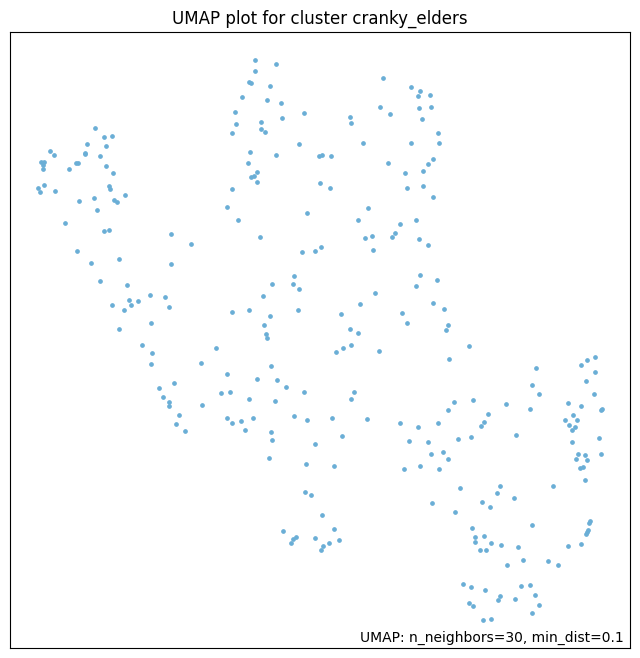

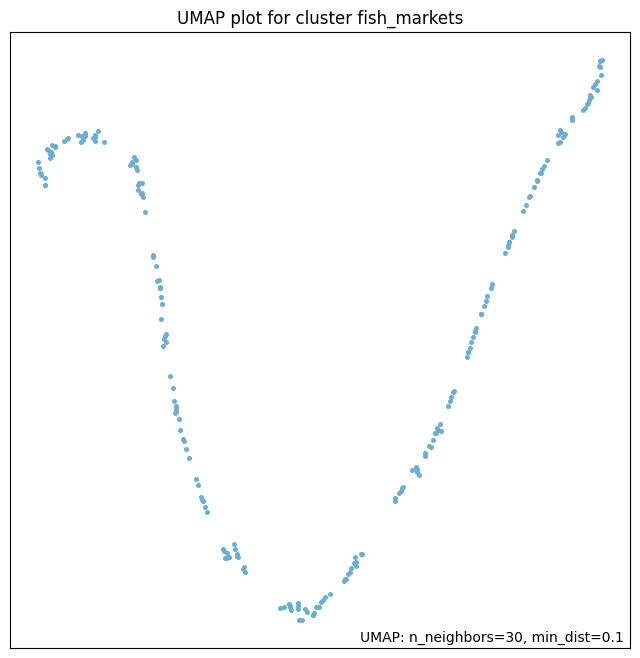

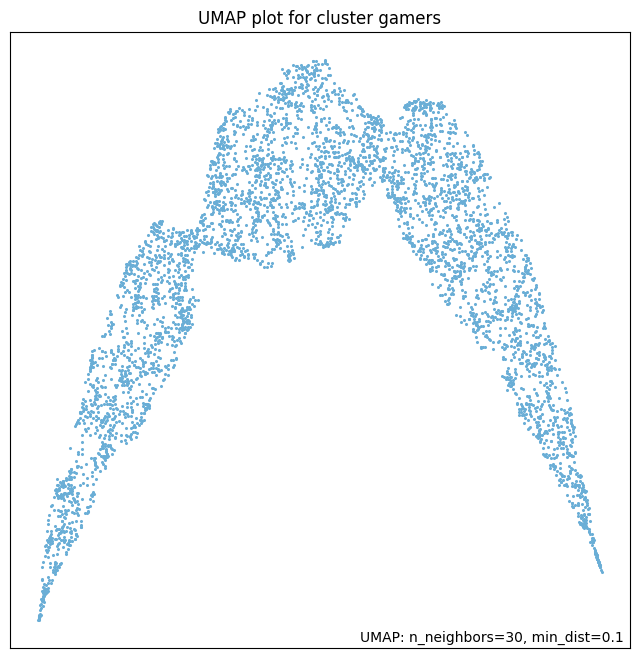

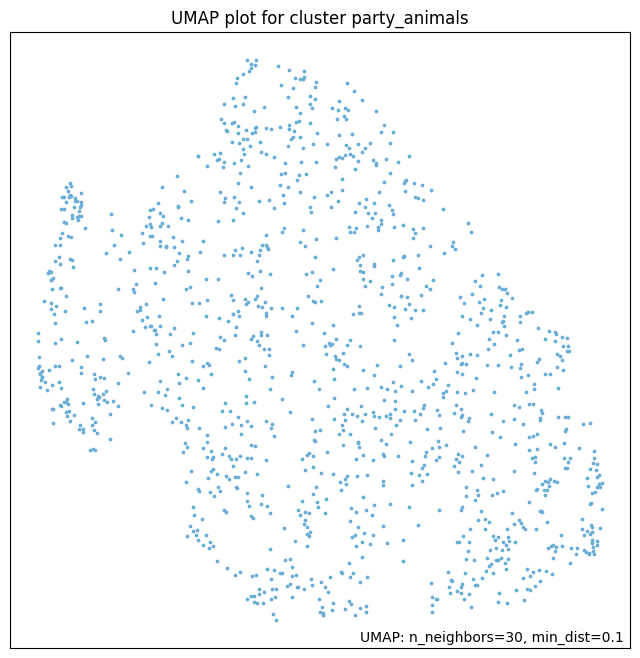

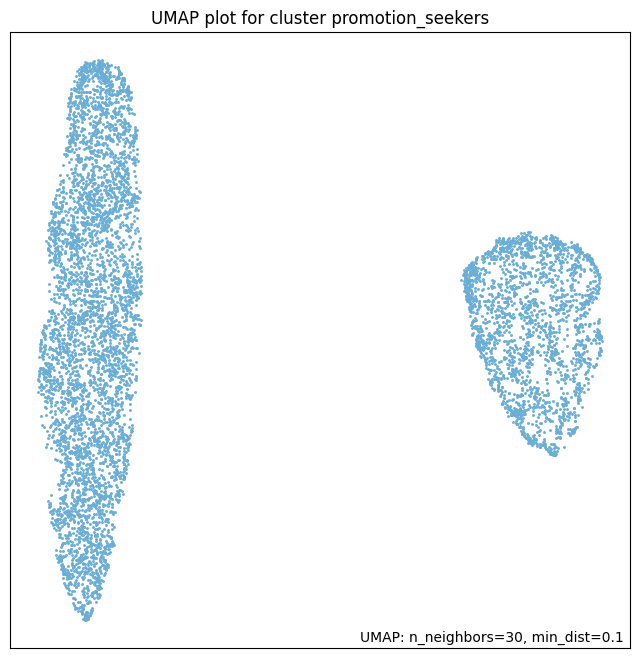

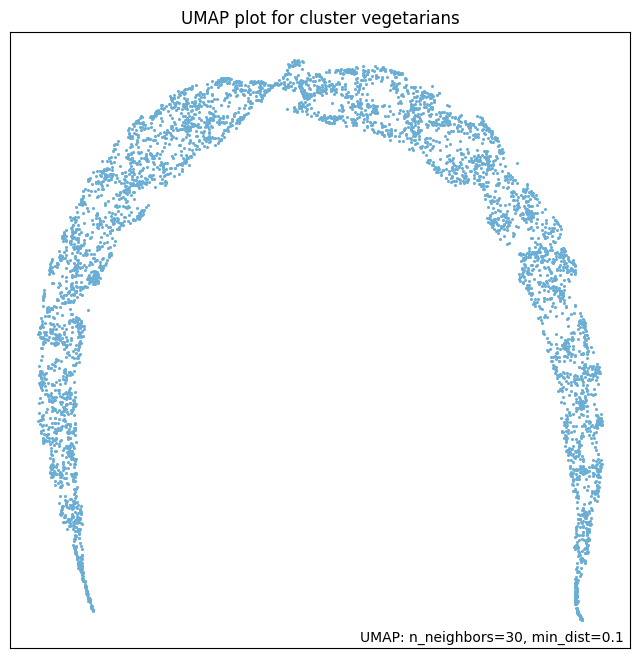

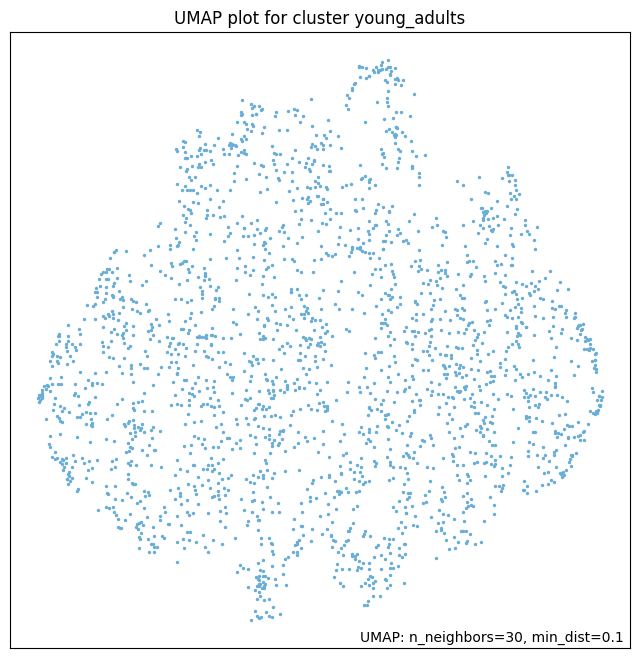

In [36]:
# show Umap plots for embedded cluster
for cluster_name, cluster_values in dfs.items():
    if cluster_name != "Info_v2":
        # add title to plot
        umap.plot.points(globals()[f"reducer_{cluster_name}"])
        plt.title(f"UMAP plot for cluster {cluster_name}")
        plt.show()